# Project 
Using Data Analysis and Data visualization to jump to a conclusion about Fandango's rating of the movies.

By Sumit Kumar

LinkedIn-https://www.linkedin.com/in/realsumitkumar/

**Overview:**

In light of recent concerns about biased online movie ratings, is it really worth trusting these ratings at all? After all, the company that produces the rating system also profits from selling movie tickets. Might they be inclined to rate movies higher than they should, in order to boost sales?

**Goal:**

Based on the article published in FiveThirtyEight, to see if we reach a similar conclusion? We will be using Python, NumPy, Pandas, Matplotlib and Seaborn to analyse the data and determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

**Background:**

Article-https://fivethirtyeight.com/features/fandango-movies-ratings/

Data- https://github.com/fivethirtyeight/data/tree/master/fandango

Project resources and material -www.pieriandata.com

There are two different types of data here (2 CSV files) - ratings from Fandango Stars and ratings from other sources like like Metacritic,IMDB, and Rotten Tomatoes. Together, they provide a more comprehensive picture of how people are reacting to films.


# **Part One: Understanding the Data**

all_sites_scores.csv

all_sites_scores.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

fandango_scape.csv

fandango_scrape.csv contains every film 538 pulled from Fandango.
`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.


In [3]:
# Importing the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part Two: Exploring Fandango Displayed Scores versus True User Ratings
Let's look at the Fandango ratings to see if our analysis agrees with the article's conclusion.

In [4]:
fandango = pd.read_csv("fandango_scrape.csv")

In [5]:
#Exploring the DataFrame Properties and Head.
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Let's explore the relationship between popularity of a film and its rating by creating a scatterplot showing the relationship between rating and votes.**



<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

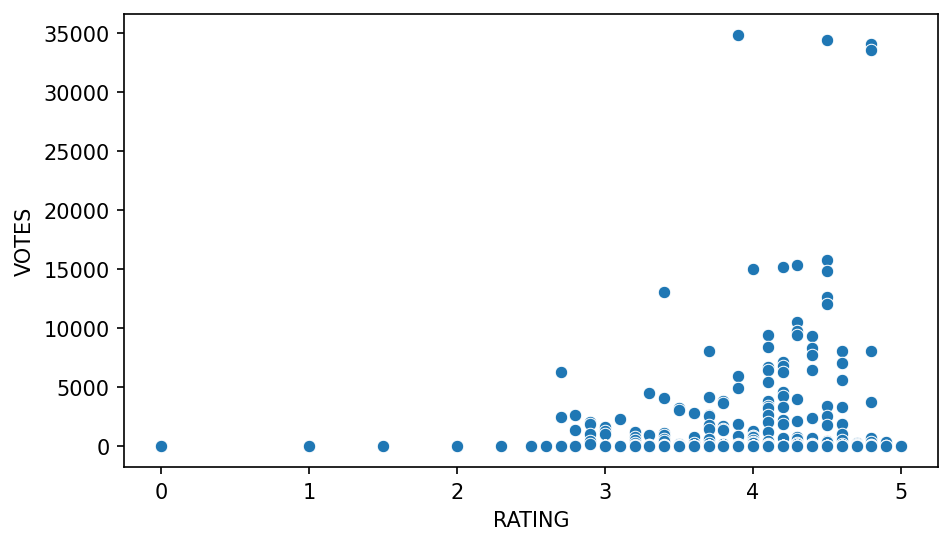

In [8]:
plt.figure(figsize=(7,4),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

**Calculating the correlation between the columns:** 

In [9]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Creating a new column that is able to strip the year from the title strings and set this new column as 'YEAR' as year column was not available.**

In [10]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [12]:
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

Finding the number of movies per year in Fandango DataFrame

In [13]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Visualize the count of movies per year with a plot:**


<AxesSubplot:xlabel='YEAR', ylabel='count'>

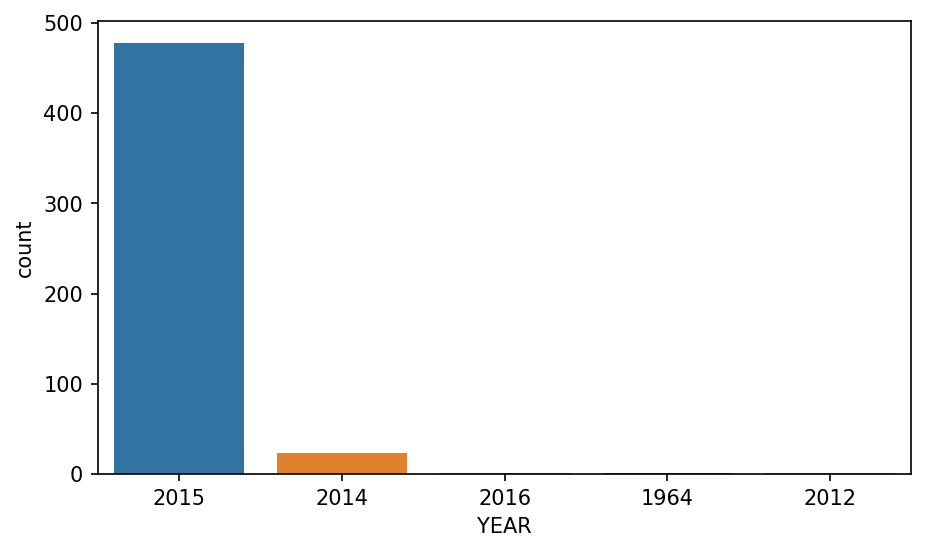

In [15]:
plt.figure(figsize=(7,4),dpi=150)
sns.countplot(data=fandango,x='YEAR')

**10 movies with the highest number of votes.**

In [17]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Number of Movies with zero votes.

In [18]:
len(fandango[fandango['VOTES'].values == 0])

69

Creating DataFrame of only reviewed films by removing any films that have zero votes

In [19]:
df = fandango[fandango['VOTES'].values != 0]

In [20]:
df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

Creating KDE plots that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Also Clip the KDEs to 0-5 as ratings are between 0-5

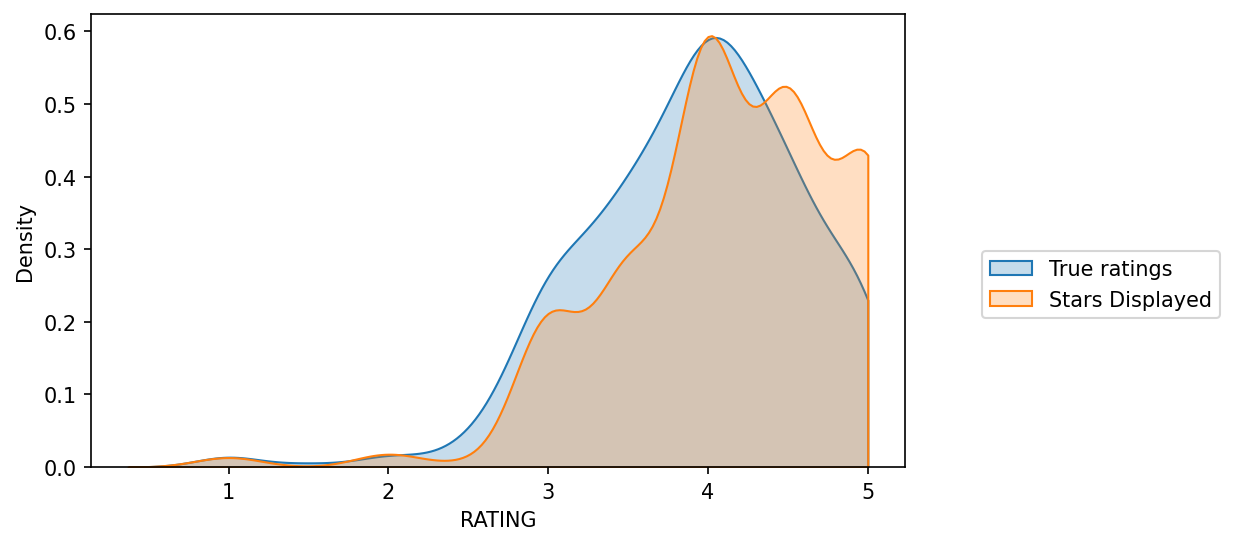

In [21]:
plt.figure(figsize=(7,4),dpi=150)

sns.kdeplot(data=df,x='RATING',fill=True,clip=[0,5],legend=True,label='True ratings')
sns.kdeplot(data=df,x='STARS',fill=True,clip=[0,5],legend=True,label='Stars Displayed')

plt.legend(bbox_to_anchor=(1.40,0.5))

Let's now actually quantify this discrepancy by creating a new column of the difference between STARS displayed versus true RATING(to the nearest decimal point for better readbility)

In [27]:
#chained_assignment is None to hide copy warnings
pd.options.mode.chained_assignment = None
df['STARS_DIFF'] = (df['STARS'] - df['RATING']).round(1)

In [26]:
df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Create a count plot to display the number of times a certain difference occurs:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

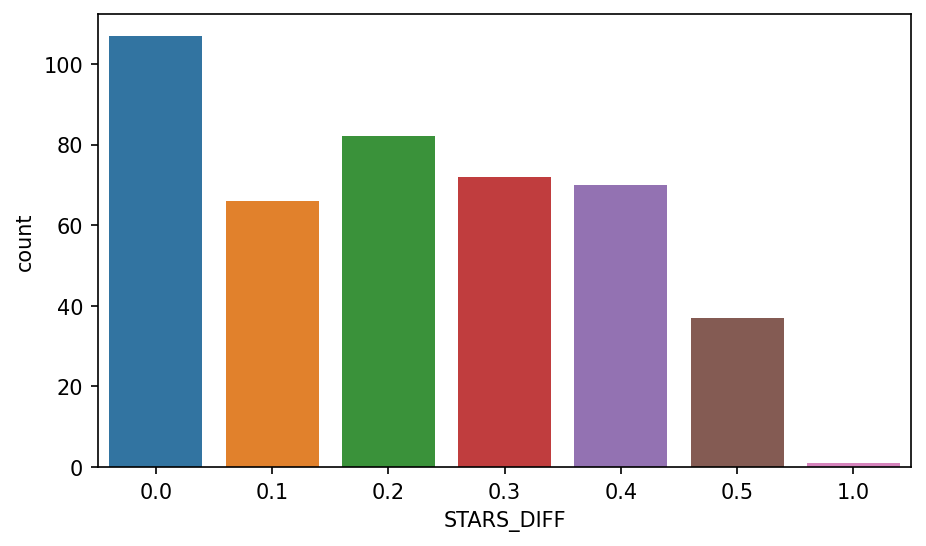

In [28]:
plt.figure(figsize=(7,4),dpi=150)

sns.countplot(data=df,x='STARS_DIFF')

We can see from the plot that one movie was displaying over a 1 star difference than its true rating! Let's find out this movie which has close to 1 star difference ?

In [29]:
df[df['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# Part Three: Comparison of Fandango Ratings to Other Sites
Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [30]:
#Reading "all_sites_scores.csv"
all_sites = pd.read_csv("all_sites_scores.csv")

Exploring the DataFrame columns, info, description.


In [31]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


# Rotten Tomatoes
**Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews.**

Creating a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.

(0.0, 100.0)

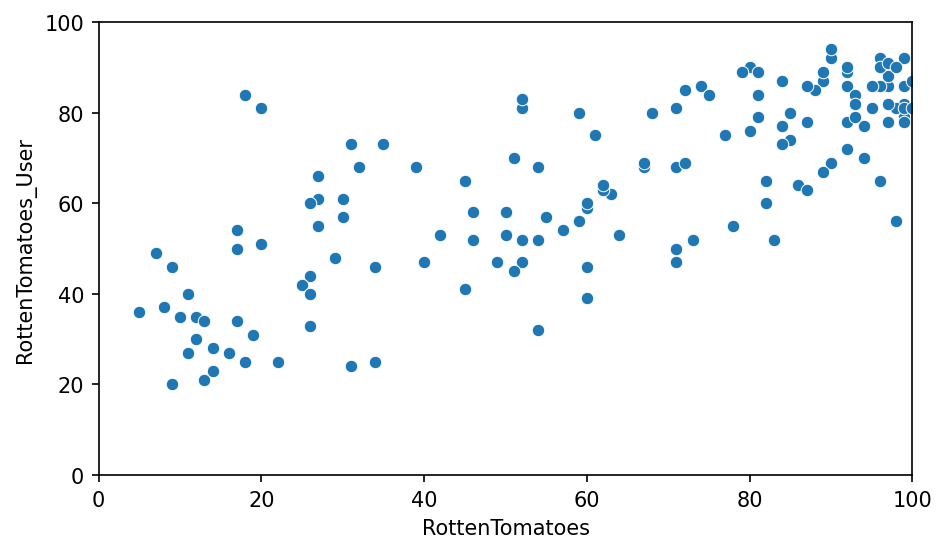

In [32]:
plt.figure(figsize=(7,4),dpi=150)

sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

**Let's now quantify this difference by comparing the critics ratings and the RT User ratings.** 

We will calculate this with RottenTomatoes-RottenTomatoes_User.The values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

In [35]:
#Creating a new column based off the difference

all_sites['RT_DIFF'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [34]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

In [36]:
all_sites['RT_DIFF'].abs().mean()

15.095890410958905

**Ploting the distribution of the differences between RT Critics Score and RT User Score.**

Text(0.5, 1.0, 'RT critics score minus RT users score')

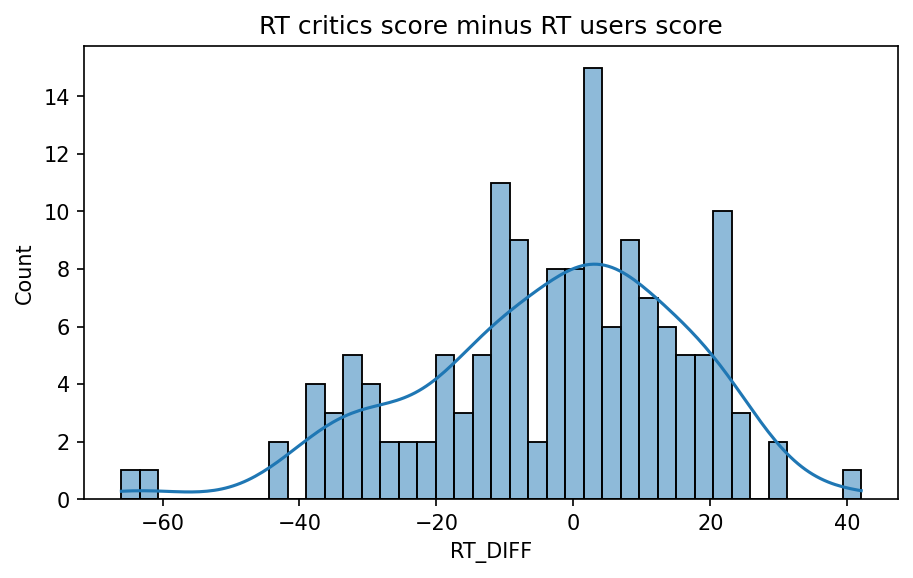

In [37]:
plt.figure(figsize=(7,4),dpi=150)
sns.histplot(data=all_sites,x='RT_DIFF',bins=40,kde=True)
plt.title('RT critics score minus RT users score')

**Now creating a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.**


Text(0.5, 1.0, 'Absolute difference between RT critics score and RT users score')

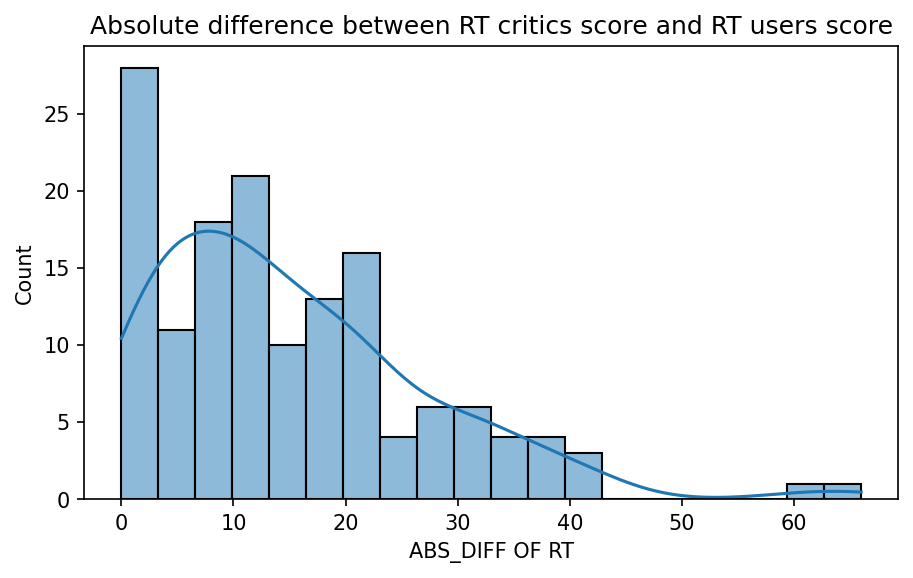

In [38]:
all_sites['ABS_DIFF OF RT'] = all_sites['RT_DIFF'].abs()

plt.figure(figsize=(7,4),dpi=150)
sns.histplot(data=all_sites,x='ABS_DIFF OF RT',bins=20,kde=True)
plt.title('Absolute difference between RT critics score and RT users score')

**Let's find out which movies are causing the largest differences.**

First, show the top 5 movies with the largest negative difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.

In [40]:
# Top 5 movies users rated higher than critics on average
all_sites.nsmallest(5,'RT_DIFF')[['FILM','RT_DIFF']]

,FILM,RT_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


Now show the top 5 movies critics scores higher than users on average.

In [41]:
all_sites.nlargest(5,'RT_DIFF')[['FILM','RT_DIFF']]

,FILM,RT_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

(0.0, 10.0)

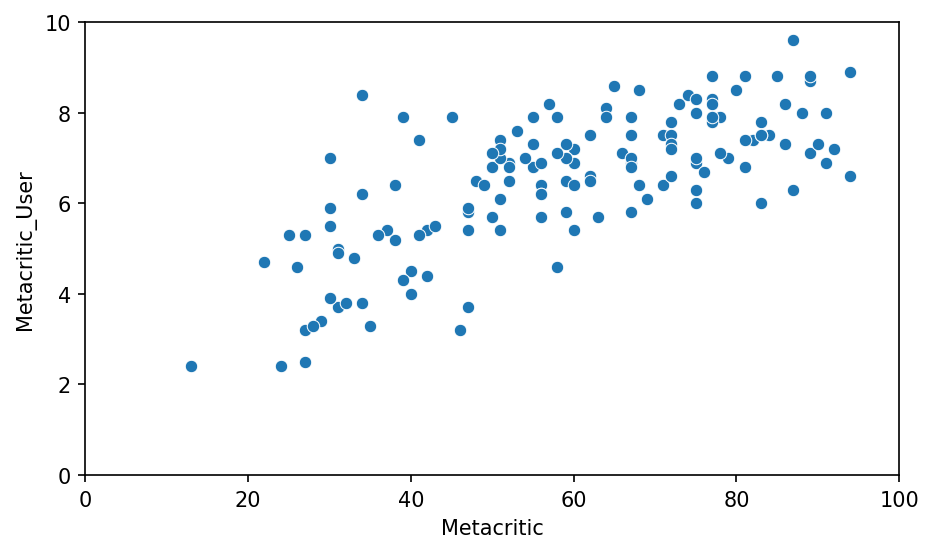

In [42]:
plt.figure(figsize=(7,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**Creating a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

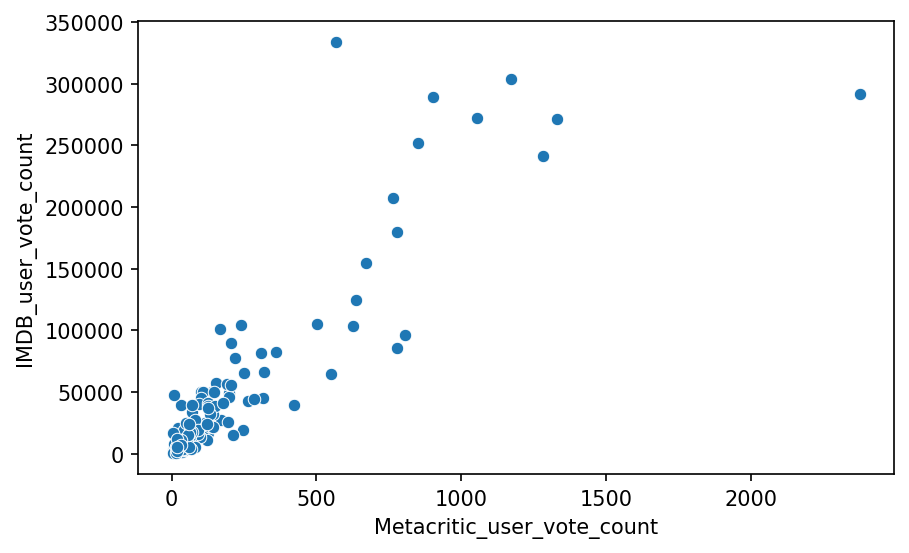

In [46]:
plt.figure(figsize=(6.5,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. 
Let's find out this movie.**

In [47]:
# movie with highest IMDB user vote count
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,ABS_DIFF OF RT
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


In [49]:
# movie with highest Metacritic User Vote count
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,ABS_DIFF OF RT
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**Combine the Fandango Table with the All Sites table.**
Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so with an inner merge,we can merge together both DataFrames based on the FILM columns.

In [50]:
pd_merged = pd.merge(fandango,all_sites,how='inner',on='FILM')

In [51]:
pd_merged.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,ABS_DIFF OF RT
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

We noticed that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**Creating new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango.**



In [53]:
# Conversion by dividing the ratings of 100 with 20 and ratings of 10 with 2 to make it a rating out of 5

pd_merged['RT_Norm'] = (pd_merged['RottenTomatoes'] /20).round(1)
pd_merged['RTU_Norm'] = (pd_merged['RottenTomatoes_User'] /20).round(1)
pd_merged['Meta_Norm'] = (pd_merged['Metacritic'] /20).round(1)
pd_merged['Meta_U_Norm'] = (pd_merged['Metacritic_User'] /2).round(1)
pd_merged['IMDB_Norm'] = (pd_merged['IMDB'] /2).round(1)

In [55]:
pd_merged.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,ABS_DIFF OF RT,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8,4.9,4.5,4.7,4.4,4.3


Now creating a norm_scores DataFrame that only contains the normalizes ratings, including both STARS and RATING from the original Fandango table.

In [56]:
norm_scores = pd_merged[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushed displayed RATING higher than STARS, but are the ratings themselves higher than average?

**Creating a plot comparing the distributions of normalized ratings across all sites.**

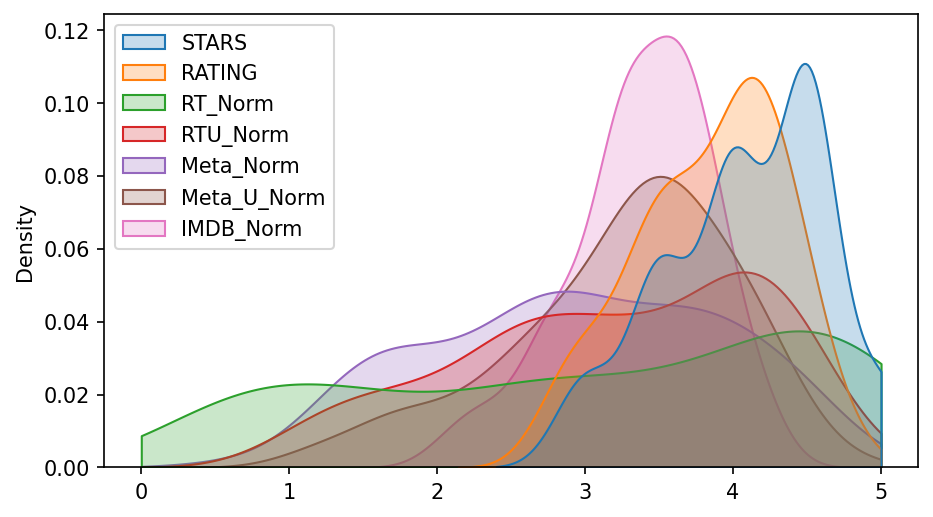

In [57]:
plt.figure(figsize=(7,4),dpi=150)
ax = sns.kdeplot(data=norm_scores,fill=True,clip=[0,5])
sns.move_legend(ax, "upper left")

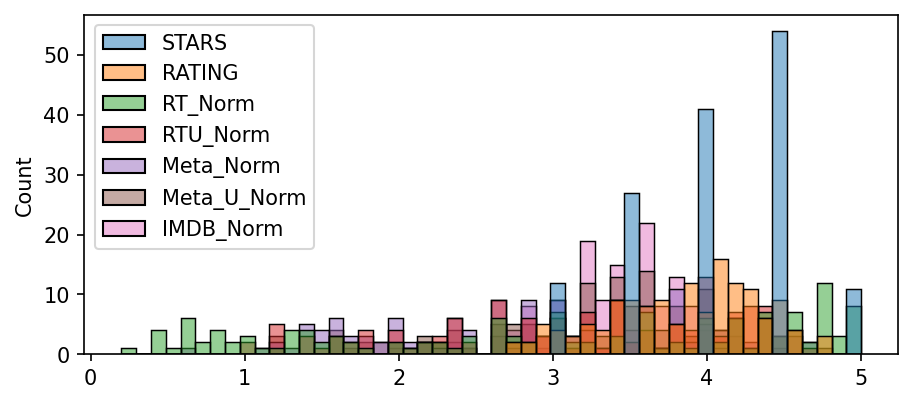

In [59]:
#Creating a histplot comparing all normalized scores.
plt.figure(figsize=(7,3),dpi=150)
ax = sns.histplot(data=norm_scores,bins=50)


**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.**

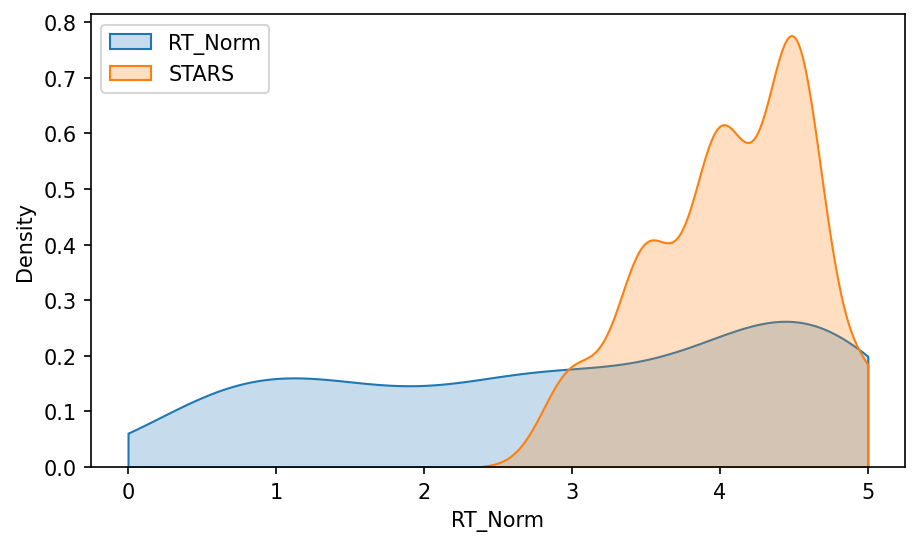

In [58]:
plt.figure(figsize=(7,4),dpi=150)
ax = sns.kdeplot(data=norm_scores,x='RT_Norm',fill=True,clip=[0,5])
ax = sns.kdeplot(data=norm_scores,x='STARS',fill=True,clip=[0,5])

plt.legend(loc='upper left', labels=['RT_Norm', 'STARS'])
plt.show(ax)

### How are the worst movies rated across all platforms?

**Creating a clustermap visualization of all normalized scores. Noting the differences in ratings, highly rated movies are clustered together versus poorly rated movies.**

<Figure size 1050x450 with 0 Axes>

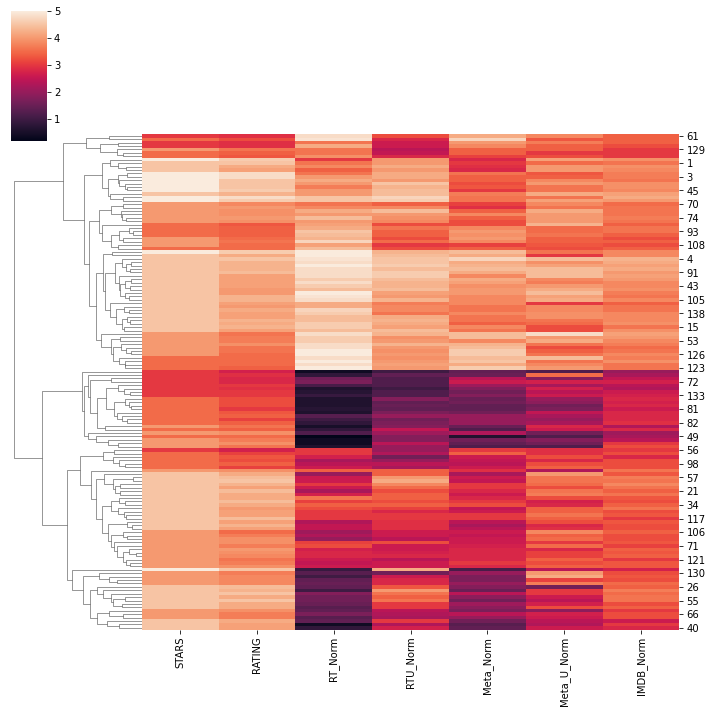

In [60]:
plt.figure(figsize=(7,3),dpi=150)
sns.clustermap(data=norm_scores,col_cluster=False)

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating.**

Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?

In [61]:
# adding the FILM column back in to your DataFrame of normalized scores to see the results.
norm_scores['FILM'] = pd_merged['FILM']
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


**Visualize the distribution of ratings across all sites for the top 10 worst movies.**

In [62]:
worst_movies = norm_scores.nsmallest(10,'RT_Norm')
worst_movies

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Text(0.5, 1.0, 'Ratings across all sites for the top 10 worst movies')

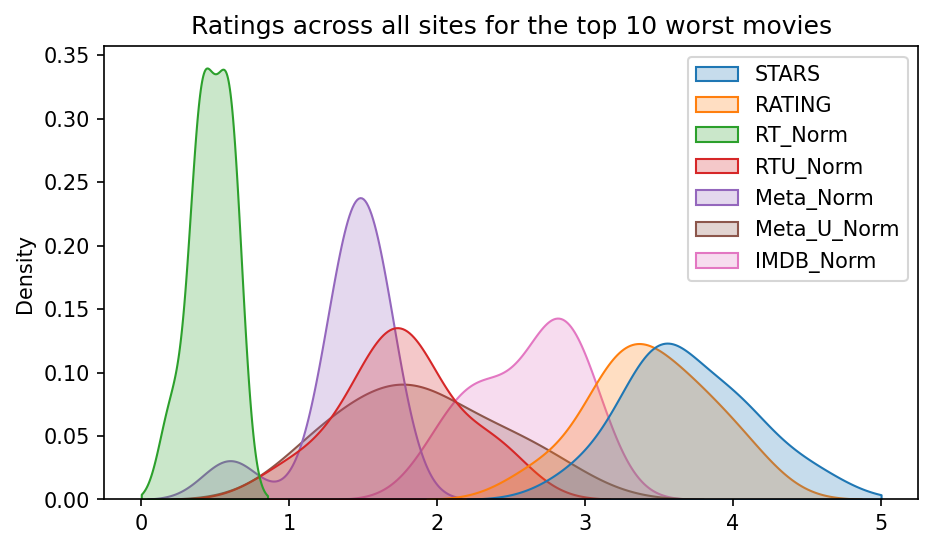

In [65]:
plt.figure(figsize=(7,4),dpi=150)
sns.kdeplot(data=worst_movies,fill=True,clip=(0,5))
plt.title('Ratings across all sites for the top 10 worst movies')

**Thoughts: Fandango is showing around 3-4 star ratings for films that are clearly bad!** 


For example take Notice of the biggest offender, Taken 3!. Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms!

In [68]:
# avg rating of Taken 3 = (0.4+2.3+1.3+2.3+3)/5 = 1.86 Across all other platforms.
worst_movies[worst_movies['FILM'] == 'Taken 3 (2015)']

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)




<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

## **Final thoughts: Really ! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**



# Clearly  Fandango has a bias towards rating movies higher than they should be rated. 